Iniciando processo de ETL do dataset

In [3]:
import pandas as pd

df_original = pd.read_csv('C:/Users/PC/Desktop/Cursos TI/aprendizado banco de dados/dataset ecommerce/data/olist_orders_dataset.csv')

df = df_original.copy()

print(df.head(8))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      20

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
import pandas as pd

# Ajutando visualização no pandas
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_columns', None) 

In [6]:
# Explorando valores nulos
if df.isnull().sum().sum() > 0:
    valores_nulos = df[df.isnull().any(axis=1)]
    print('Existem valores nulos em\n' + str(valores_nulos))
else:
    print('Não existem valores nulos')

Existem valores nulos em
                               order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17                          NaN                           NaN           2017-05-09 00:00:00
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5      shipped      2018-06-04 16:44:48  2018-06-05 04:31:18          2018-06-05 14:32:00                           NaN           2018-06-28 00:00:00
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5     invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14                          NaN                           NaN           2018-08-21 00:00:00
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   processing 

In [7]:

#Checando cada valor nulo com base na coluna order_status para eliminar desnecessários

for status in ['delivered']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')
for status in ['unavailable']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')
for status in ['processing']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')
for status in ['shipped']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')
for status in ['invoiced']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')
for status in ['canceled']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}:\n{nulos}\n')

Valores nulos para o status delivered:
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Valores nulos para o status unavailable:
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

Valores nulos para o status processing:
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_est

In [8]:
for status in ['delivered']:
    nulos = df[df['order_status'] == status].isnull().sum()
    print(f'Valores nulos para o status {status}: \n{nulos}\n')


Valores nulos para o status delivered: 
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64



In [9]:
df_nulos = df[df['order_status'] == 'delivered']
df_nulos = df_nulos[df_nulos[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)]

print(df_nulos)


                               order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f    delivered      2017-11-28 17:44:07  2017-11-28 17:56:40          2017-11-30 18:12:23                           NaN           2017-12-18 00:00:00
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771    delivered      2017-02-18 14:40:00                  NaN          2017-02-23 12:04:47           2017-03-01 13:25:33           2017-03-17 00:00:00
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f    delivered      2017-02-18 12:45:31                  NaN          2017-02-23 09:01:52           2017-03-02 10:05:06           2017-03-21 00:00:00
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3    delivered      2017-02-18 13:29:47 

Escolhi agrupar as colunas relevantes dos datasets antes de realizar qualquer possivel exclusão de valores

In [10]:
df_reviews_original = pd.read_csv('C:/Users/PC/Desktop/Cursos TI/aprendizado banco de dados/dataset ecommerce/data/olist_order_reviews_dataset.csv')
df_reviews = df_reviews_original.copy()

print(df_reviews.head(10))

                          review_id                          order_id  review_score review_comment_title                                                                                                                                                          review_comment_message review_creation_date review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb             4                  NaN                                                                                                                                                                             NaN  2018-01-18 00:00:00     2018-01-18 21:46:59
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33             5                  NaN                                                                                                                                                                             NaN  2018-03-10 00:00:00     2018-03-11 03:05:13
2  228ce5500dc1d8e020d

In [11]:
# Coluna review_score possivelmente será o target do modelo de predição
df = df.merge(df_reviews[['order_id', 'review_score']], on='order_id', how='left')

print(df.head())

                           order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date  review_score
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15          2017-10-04 19:55:00           2017-10-10 21:25:13           2017-10-18 00:00:00           4.0
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00           2018-08-07 15:27:45           2018-08-13 00:00:00           4.0
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23          2018-08-08 13:50:00           2018-08-17 18:06:29           2018-09-04 00:00:00           5.0
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   

In [12]:
# Convertendo colunas para datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  datetime64[ns]
 5   order_delivered_carrier_date   98199 non-null  datetime64[ns]
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   review_score                   99224 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.9+ MB


In [13]:

# Visualizando os porcentagens de valores nulos
df['review_score'].isnull().sum() / df.shape[0] * 100   

np.float64(0.7680614449155932)

In [14]:
# Analisando a coluna review_score com coeficiente de variação
df['review_score'].describe()
std_review = df['review_score'].std()
mean_review = df['review_score'].mean()

cv = (std_review / mean_review) * 100

print(cv)

32.97700494135574


In [15]:
# Criando a coluna review_score_null para indicar se o review_score é nulo
df['review_score_null'] = df['review_score'].isnull().astype(int)

print(df.head(10))

                           order_id                       customer_id order_status order_purchase_timestamp   order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date  review_score  review_score_null
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00           2017-10-10 21:25:13                    2017-10-18           4.0                  0
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00           2018-08-07 15:27:45                    2018-08-13           4.0                  0
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00           2018-08-17 18:06:29                    2018-09-04           5.0                  0


Começando o processo de normalização e classificação das colunas

In [16]:
# Criando a diferença entre a data estimada e a data real
df['delivery_delay'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

print(df['delivery_delay'])


0         7.0
1         5.0
2        17.0
3        12.0
4         9.0
         ... 
99987    10.0
99988     1.0
99989     5.0
99990    20.0
99991    17.0
Name: delivery_delay, Length: 99992, dtype: float64


In [17]:
# Criando coluna binária para o atraso na entrega
import numpy as np

df['delivery_delay_bin'] = df['delivery_delay'].apply(lambda x: 1 if x < 0 else 0) # Atraso = 1, Não Atraso = 0
print(df['delivery_delay_bin'].value_counts())

delivery_delay_bin
0    92126
1     7866
Name: count, dtype: int64


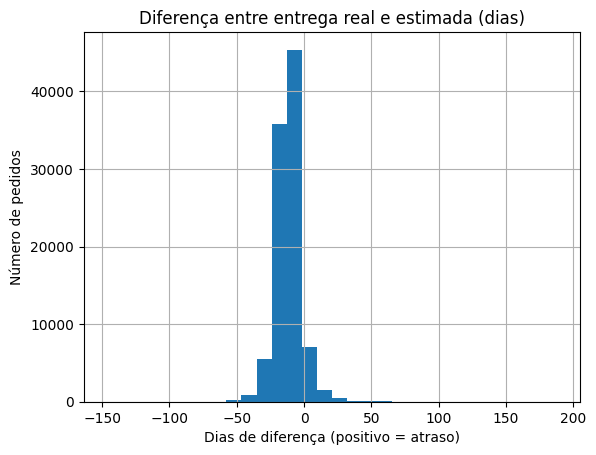

In [18]:

# Histograma para visualizar a diferença entre entrega real e estimada

import matplotlib.pyplot as plt

df['delivery_diff_days'] = df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
df['delivery_diff_days'] = df['delivery_diff_days'].dt.days


df['delivery_diff_days'].hist(bins=30)
plt.title("Diferença entre entrega real e estimada (dias)")
plt.xlabel("Dias de diferença (positivo = atraso)")
plt.ylabel("Número de pedidos")
plt.show()


In [19]:
#Criar dataset de agrupamento por numero de produtos por pedidos (a intenção é organizar os pedidos atrasados)

import pandas as pd
import numpy as np
order_items_original = pd.read_csv('C:/Users/PC/Desktop/Cursos TI/aprendizado banco de dados/dataset ecommerce/data/olist_order_items_dataset.csv')
order_items = order_items_original.copy()

pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_columns', None) 

print(order_items.head(10))

                           order_id  order_item_id                        product_id                         seller_id  shipping_limit_date   price  freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2017-09-19 09:45:35   58.90          13.29
1  00018f77f2f0320c557190d7a144bdd3              1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  2017-05-03 11:05:13  239.90          19.93
2  000229ec398224ef6ca0657da4fc703e              1  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  2018-01-18 14:48:30  199.00          17.87
3  00024acbcdf0a6daa1e931b038114c75              1  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4  2018-08-15 10:10:18   12.99          12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9              1  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  2017-02-13 13:57:51  199.90          18.14
5  00048cc3ae777c65dbb

In [20]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])



In [22]:
# Juntando os dois dataframes
products_per_order = order_items.groupby('order_id').size().reset_index(name='num_products')

df = df.merge(products_per_order, on='order_id', how='left') 

In [23]:
# Criando a coluna de valor total do pedido
order_items['total_value'] = order_items['price'] + order_items['freight_value'] 
order_total = order_items.groupby('order_id')['total_value'].sum().reset_index(name='order_total') 

df = df.merge(order_total, on='order_id', how='left')

In [24]:
# Ajustando categoria de produtos e colocando no dataframe
product_categories = order_items[['order_id', 'product_id']] #criando contexto para o merge

products_original = pd.read_csv('C:/Users/PC/Desktop/Cursos TI/aprendizado banco de dados/dataset ecommerce/data/olist_products_dataset.csv')
products = products_original.copy()

product_categories = product_categories.merge(products[['product_id', 'product_category_name']], on='product_id', how='left') 

# Indicando categoria principal do pedido usando a categoria do primeiro produto
main_category = product_categories.groupby('order_id')['product_category_name'].first().reset_index()

df = df.merge(main_category, on='order_id', how='left')

In [25]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_score_null,delivery_delay,delivery_delay_bin,delivery_diff_days,num_products,order_total,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,0,7.0,0,-8.0,1.0,38.71,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0,0,5.0,0,-6.0,1.0,141.46,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0,0,17.0,0,-18.0,1.0,179.12,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,0,12.0,0,-13.0,1.0,72.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,5.0,0,9.0,0,-10.0,1.0,28.62,papelaria


In [26]:
df = df.rename(columns={'num_products_x': 'num_products'})

In [27]:
# Preenchendo valores nulos com 0
#df['order_total'] = df['order_total'].fillna(0)
df['num_products'] = df['num_products'].fillna(0)
df['delivery_delay'] = df['delivery_delay'].fillna(0)

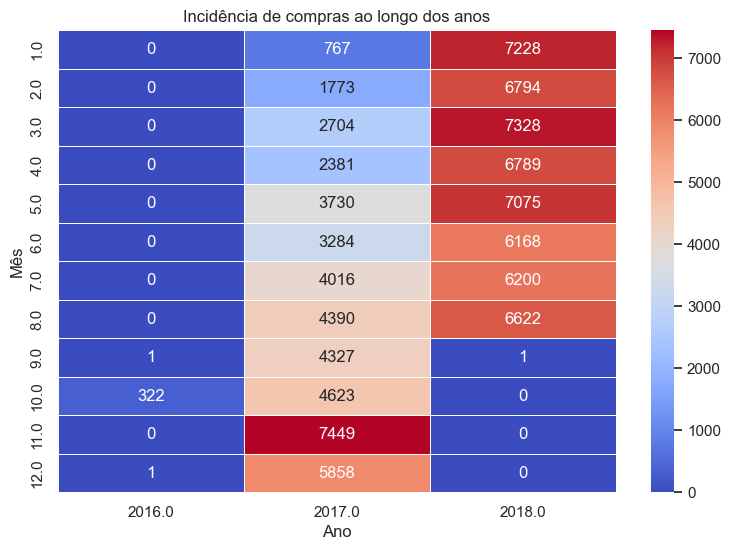

In [28]:
# Construindo heatmap para visualizar a incidência de compras ao longo dos anos
df['order_approved_at_month'] = df['order_approved_at'].dt.month  # Apenas o mês
df['order_approved_at_year'] = df['order_approved_at'].dt.year  # Apenas o ano

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df['product_category_name'] = df['product_category_name'].fillna('Unknown')

# grupando por categoria de produto e mês/ano
categoria_produto = df.groupby(['order_approved_at_month', 'order_approved_at_year']).size().unstack()

# trocando nulo por zero e convertendo para inteiro
categoria_produto = categoria_produto.fillna(0).astype(int)

# Criando o heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(categoria_produto, annot=True, fmt="d", linewidths=.5, cmap="coolwarm")
plt.title("Incidência de compras ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Mês")
plt.show()


In [29]:
# Existem valores nulos na coluna review_score e ela será o target do modelo de predição
print(df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1793
order_delivered_customer_date    2987
order_estimated_delivery_date       0
review_score                      768
review_score_null                   0
delivery_delay                      0
delivery_delay_bin                  0
delivery_diff_days               2987
num_products                        0
order_total                       778
product_category_name               0
order_approved_at_month           161
order_approved_at_year            161
dtype: int64


In [30]:
# Criando dummies de on-hot nas categorias de produtos
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=['product_category_name'], drop_first=True)

In [31]:
df_encoded.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_score_null,delivery_delay,delivery_delay_bin,delivery_diff_days,num_products,order_total,order_approved_at_month,order_approved_at_year,product_category_name_agro_industria_e_comercio,product_category_name_alimentos,product_category_name_alimentos_bebidas,product_category_name_artes,product_category_name_artes_e_artesanato,product_category_name_artigos_de_festas,product_category_name_artigos_de_natal,product_category_name_audio,product_category_name_automotivo,product_category_name_bebes,product_category_name_bebidas,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_casa_conforto,product_category_name_casa_conforto_2,product_category_name_casa_construcao,product_category_name_cds_dvds_musicais,product_category_name_cine_foto,product_category_name_climatizacao,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_construcao_ferramentas_ferramentas,product_category_name_construcao_ferramentas_iluminacao,product_category_name_construcao_ferramentas_jardim,product_category_name_construcao_ferramentas_seguranca,product_category_name_cool_stuff,product_category_name_dvds_blu_ray,product_category_name_eletrodomesticos,product_category_name_eletrodomesticos_2,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_fashion_calcados,product_category_name_fashion_esporte,product_category_name_fashion_roupa_feminina,product_category_name_fashion_roupa_infanto_juvenil,product_category_name_fashion_roupa_masculina,product_category_name_fashion_underwear_e_moda_praia,product_category_name_ferramentas_jardim,product_category_name_flores,product_category_name_fraldas_higiene,product_category_name_industria_comercio_e_negocios,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_la_cuisine,product_category_name_livros_importados,product_category_name_livros_interesse_geral,product_category_name_livros_tecnicos,product_category_name_malas_acessorios,product_category_name_market_place,product_category_name_moveis_colchao_e_estofado,product_category_name_moveis_cozinha_area_de_servico_jantar_e_jardim,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_moveis_quarto,product_category_name_moveis_sala,product_category_name_musica,product_category_name_papelaria,product_category_name_pc_gamer,product_category_name_pcs,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_portateis_cozinha_e_preparadores_de_alimentos,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,0,7.0,0,-8.0,1.0,38.71,10.0,2017.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:

In [32]:
# Criando dummies de on-hot no status do pedido
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=['order_status'], prefix='status')

In [33]:
# Organizando review_score em 3 categorias (ruim = 1,2, neutro = 3 e bom = 4,5)
def categorizar_review(score):
        if pd.isnull(score):
            return -1 # para valores nulos 
        elif score <= 2:
            return 0 
        elif score == 3:
            return 1 
        else: 
            return 2 

df['review_category'] = df['review_score'].apply(categorizar_review)

# Vamos verificar como ficou
print(df[['review_score', 'review_category']].head())
print("\nContagem das categorias:", df['review_category'].value_counts())

   review_score  review_category
0           4.0                2
1           4.0                2
2           5.0                2
3           5.0                2
4           5.0                2

Contagem das categorias: review_category
 2    76470
 0    14575
 1     8179
-1      768
Name: count, dtype: int64


In [34]:
# Os valores nulos na coluna review_score são 0,7% do total, pelo baixo percentual, podemos descartar esses valores

df_encoded = df.dropna(subset=['review_category']).copy()

print(f"Número de linhas antes da remoção : {df.shape[0]}")
print(f"Número de linhas após a remoção: {df_encoded.shape[0]}")


Número de linhas antes da remoção : 99992
Número de linhas após a remoção: 99992


In [35]:
# Eliminando linhas com valores nulos na coluna order_approved_at, pois entende-se que houve cancelamento do pedido

df_encoded = df.dropna(subset=['order_approved_at']).copy()

print(f"Número de linhas antes da remoção : {df.shape[0]}")
print(f"Número de linhas após a remoção: {df_encoded.shape[0]}")

Número de linhas antes da remoção : 99992
Número de linhas após a remoção: 99831


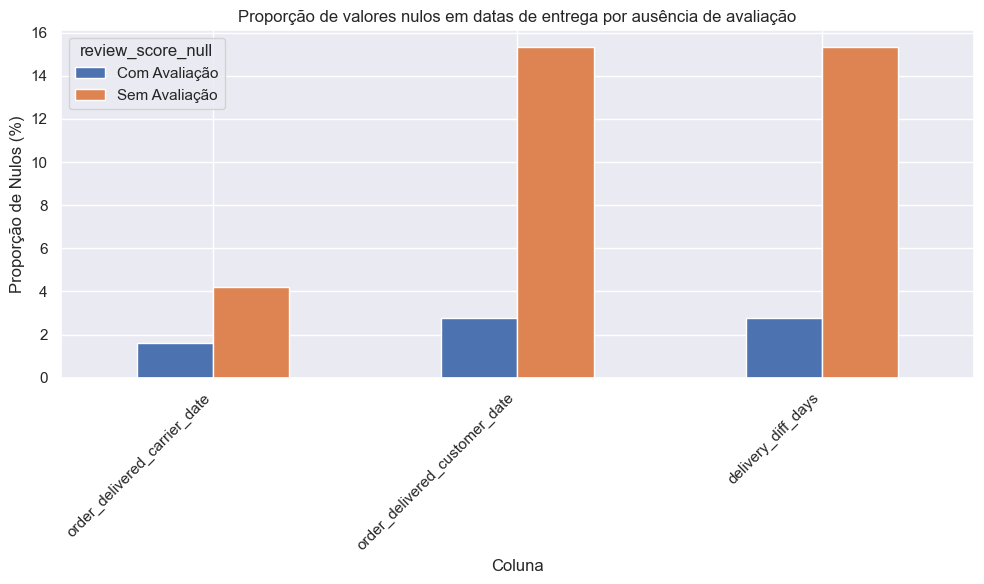

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular a proporção de nulos nas colunas de data por review_score_null
nulos_por_review = df_encoded.groupby('review_score_null')[['order_delivered_carrier_date', 'order_delivered_customer_date', 'delivery_diff_days']].apply(lambda x: x.isnull().sum() / len(x) * 100)

# Plotar um gráfico de barras
nulos_por_review.T.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Proporção de valores nulos em datas de entrega por ausência de avaliação')
plt.xlabel('Coluna')
plt.ylabel('Proporção de Nulos (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='review_score_null', labels=['Com Avaliação', 'Sem Avaliação'])
plt.tight_layout()
plt.show()

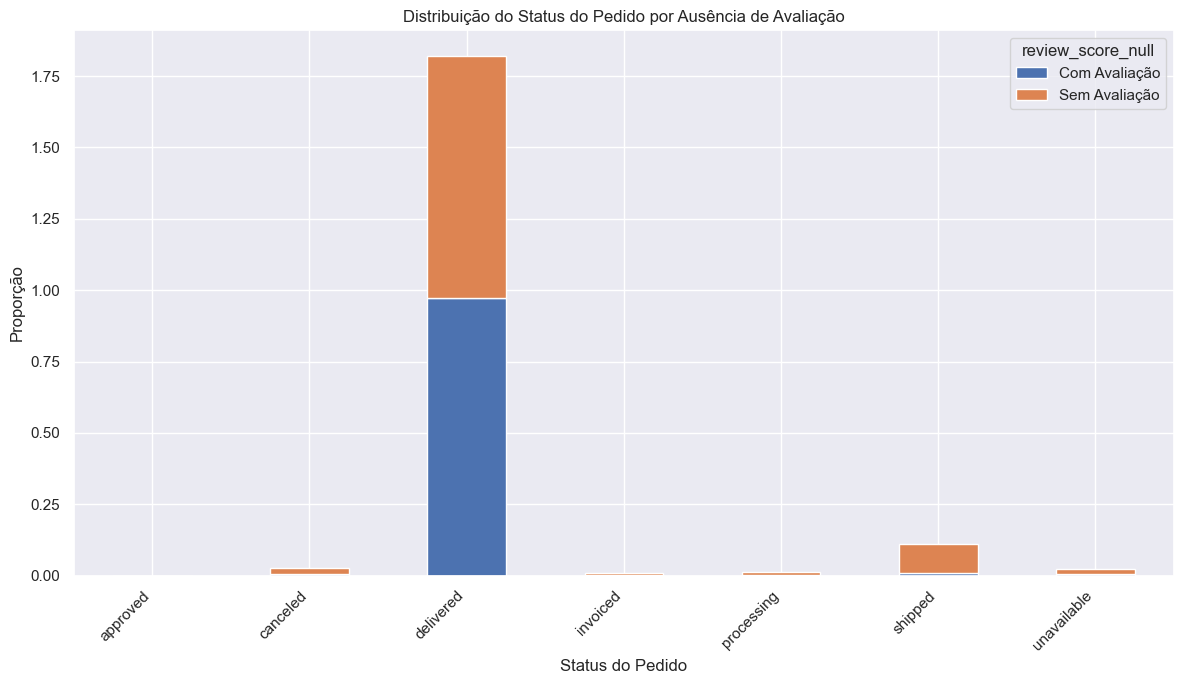

In [37]:
# Contagem de status de pedido por review_score_null
status_por_review = df_encoded.groupby('review_score_null')['order_status'].value_counts(normalize=True).unstack().fillna(0)

# Plotar um gráfico de barras empilhadas
status_por_review.T.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribuição do Status do Pedido por Ausência de Avaliação')
plt.xlabel('Status do Pedido')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right')
plt.legend(title='review_score_null', labels=['Com Avaliação', 'Sem Avaliação'])
plt.tight_layout()
plt.show()

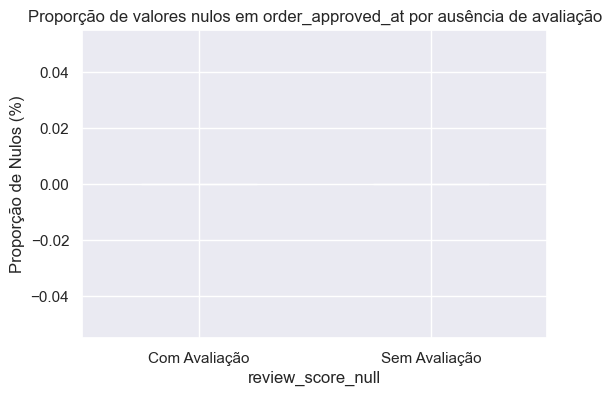

In [38]:
# Calcular a proporção de nulos em order_approved_at por review_score_null
nulos_approved = df_encoded.groupby('review_score_null')['order_approved_at'].apply(lambda x: x.isnull().sum() / len(x) * 100)

# Plotar um gráfico de barras
nulos_approved.plot(kind='bar', figsize=(6, 4))
plt.title('Proporção de valores nulos em order_approved_at por ausência de avaliação')
plt.xlabel('review_score_null')
plt.ylabel('Proporção de Nulos (%)')
plt.xticks([0, 1], ['Com Avaliação', 'Sem Avaliação'], rotation=0)
plt.show()

In [39]:
# Fazendo a análise cruzada entre review_score_null e null_delivered_carrier (movimento inverso para analisar os valores de entrega na transportadora com relação ao status do pedido)
df_encoded['null_delivered_carrier'] = df_encoded[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)


print(df_encoded[['review_score', 'review_score_null', 'order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'null_delivered_carrier']].head(10))


   review_score  review_score_null order_status   order_approved_at order_delivered_carrier_date order_delivered_customer_date  null_delivered_carrier
0           4.0                  0    delivered 2017-10-02 11:07:15          2017-10-04 19:55:00           2017-10-10 21:25:13                   False
1           4.0                  0    delivered 2018-07-26 03:24:27          2018-07-26 14:31:00           2018-08-07 15:27:45                   False
2           5.0                  0    delivered 2018-08-08 08:55:23          2018-08-08 13:50:00           2018-08-17 18:06:29                   False
3           5.0                  0    delivered 2017-11-18 19:45:59          2017-11-22 13:39:59           2017-12-02 00:28:42                   False
4           5.0                  0    delivered 2018-02-13 22:20:29          2018-02-14 19:46:34           2018-02-16 18:17:02                   False
5           4.0                  0    delivered 2017-07-09 22:10:13          2017-07-11 14:58:

In [40]:
# Analisando a relação entre review_score_null com null_delivered_carrier utilizando crosstab (é mais adequado para variaveis categóricas/booleanas)
crosstab_review_score_null_vs_null_delivered_carrier = pd.crosstab(
    df_encoded['review_score_null'],
    df_encoded['null_delivered_carrier'],
    normalize='index',
)

print("\n-- 'review_score_null' vs 'null_delivered_carrier' --")
print(crosstab_review_score_null_vs_null_delivered_carrier)


-- 'review_score_null' vs 'null_delivered_carrier' --
null_delivered_carrier     False     True 
review_score_null                         
0                       0.972504  0.027496
1                       0.846658  0.153342


In [41]:
# Analisando a relação entre 'review_score_null' e 'order_status'

status_dist_when_review_null = df_encoded[df_encoded['review_score_null'] == 1]['order_status'].value_counts(normalize=True) * 100
print(status_dist_when_review_null)

order_status
delivered      84.665793
shipped         9.829620
canceled        2.228047
unavailable     1.834862
processing      0.786370
invoiced        0.655308
Name: proportion, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_8272\1299849091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


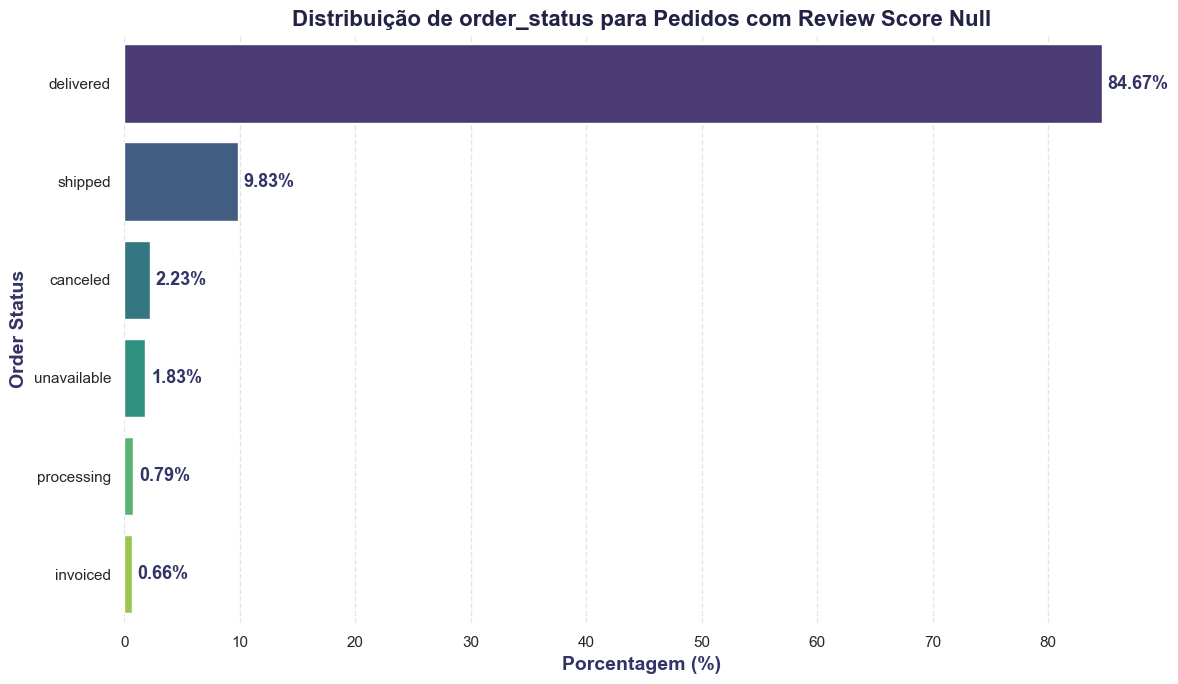

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    y=status_dist_when_review_null.index,
    x=status_dist_when_review_null.values,
    palette="viridis"
)

for i, (value, label) in enumerate(zip(status_dist_when_review_null.values, status_dist_when_review_null.index)):
    ax.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=13, fontweight='bold', color='#333366')

plt.xlabel('Porcentagem (%)', fontsize=14, fontweight='bold', color='#333366')
plt.ylabel('Order Status', fontsize=14, fontweight='bold', color='#333366')
plt.title('Distribuição de order_status para Pedidos com Review Score Null', fontsize=16, fontweight='bold', color='#222244')
plt.xlim(0, status_dist_when_review_null.values.max() + 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

Será criado nova features para discriminar ao modelo as associações entre review score vazios, status do pedido e envio do pedido para transportado. O objetivo é dar mais entendimento sobre o review_score

In [43]:
#Agrupando a proporção de review_score nulo por order_status e renomenando para virar coluna (e feature)
mean_review_score_null_by_status = df.groupby('order_status')['review_score_null'].mean().reset_index()

mean_review_score_null_by_status = mean_review_score_null_by_status.rename(columns={'review_score_null': 'mean_review_score_null_by_status'})

# mesclando no df_encoded
df_encoded = pd.merge(df_encoded, mean_review_score_null_by_status, on='order_status', how='left')



In [44]:
# Agrupar e contar os nulls em order_delivered_carrier_date por order_status
gby_delivered_carrier_date = df.groupby('order_status')['order_delivered_carrier_date'].agg(total_pedidos='size', null_delivered_carrier_date=lambda x: x.isnull().sum()).reset_index()

# Calcular a porcentagem de NaNs
gby_delivered_carrier_date_bin = gby_delivered_carrier_date.rename(columns={'gby_delivered_carrier_date': 'null_delivered_carrier_date_bin'})

df_encoded = pd.merge(df_encoded, gby_delivered_carrier_date_bin, on='order_status', how='left')



In [45]:
# Criando Feature tempo estimado total (em dias), foi criada uma com os pedidos em atraso, mas ela estava causando leakage
df_encoded['estimated_total_time'] = (df_encoded['order_estimated_delivery_date'] - df_encoded['order_purchase_timestamp']).dt.days.fillna(-1) # Tratar nulos

In [46]:
# Criando top_category para indicar se a categoria do produto é uma das 10 mais frequentes
top_cats = df['product_category_name'].value_counts().nlargest(10).index
df['top_category'] = df['product_category_name'].apply(lambda x: 1 if x in top_cats else 0)

# Adicionando a coluna 'top_category' do df ao df_encoded antes de selecionar as features
df_encoded['top_category'] = df.loc[df_encoded.index, 'top_category'].values

df_encoded = df_encoded[df_encoded.columns.tolist() + ['top_category']]

In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99831 entries, 0 to 99830
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          99831 non-null  object        
 1   customer_id                       99831 non-null  object        
 2   order_status                      99831 non-null  object        
 3   order_purchase_timestamp          99831 non-null  datetime64[ns]
 4   order_approved_at                 99831 non-null  datetime64[ns]
 5   order_delivered_carrier_date      98185 non-null  datetime64[ns]
 6   order_delivered_customer_date     96991 non-null  datetime64[ns]
 7   order_estimated_delivery_date     99831 non-null  datetime64[ns]
 8   review_score                      99068 non-null  float64       
 9   review_score_null                 99831 non-null  int64         
 10  delivery_delay                    99831 non-nu

In [48]:
df_encoded['order_status'].infer_objects().value_counts()

order_status
delivered      96993
shipped         1118
unavailable      611
canceled         487
invoiced         318
processing       302
approved           2
Name: count, dtype: int64

In [49]:
# Mapeando os status do pedido para valores int64 (para ele não ignorar os nulos e rodar no train split)
order_status_mapping = {
    'delivered': 0,
    'shipped': 1,
    'unavailable': 2,
    'canceled': 3,
    'invoiced': 4,
    'processing': 5,
    'approved': 6,
}

df_encoded['order_status_encoded'] = df_encoded['order_status'].map(order_status_mapping)



In [90]:
print(df_encoded.isnull().sum())

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                      0
order_delivered_carrier_date        1646
order_delivered_customer_date       2840
order_estimated_delivery_date          0
review_score                         763
review_score_null                      0
delivery_delay                         0
delivery_delay_bin                     0
delivery_diff_days                  2840
num_products                           0
order_total                          631
product_category_name                  0
order_approved_at_month                0
order_approved_at_year                 0
review_category                        0
null_delivered_carrier                 0
mean_review_score_null_by_status       0
total_pedidos                          0
null_delivered_carrier_date            0
estimated_total_time                   0
top_category    

In [91]:
# Features (x) das colunas preditoras
X = df_encoded[[
    'estimated_total_time',
    'delivery_delay',
    'num_products',
    'order_status_encoded',
    'review_score_null',
    'mean_review_score_null_by_status',
    'null_delivered_carrier_date',
    'total_pedidos',
] + [col for col in df_encoded.columns if col.startswith('product_category_name_')]]

y = df_encoded['review_category'] # target

Como o Dataset é tem classes desbalanceadas (entre valores vazios e muitos desproporcionais), será utilizado SMOTE no conjunto de treino

In [92]:
# Separando dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify para manter a proporção nas classes desbalanceadas

print(f"conjunto de treino (X_train): {X_train.shape}")
print(f"conjunto de teste (X_test): {X_test.shape}")
print(f"Distribuição em y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição em y_test:\n{y_test.value_counts(normalize=True)}")

conjunto de treino (X_train): (79864, 8)
conjunto de teste (X_test): (19967, 8)
Distribuição em y_train:
review_category
 2    0.765401
 0    0.145209
 1    0.081751
-1    0.007638
Name: proportion, dtype: float64
Distribuição em y_test:
review_category
 2    0.765413
 0    0.145190
 1    0.081735
-1    0.007663
Name: proportion, dtype: float64


In [93]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear as classes

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tamanho de X_train após SMOTE: {X_train_resampled.shape}")
print(f"Distribuição das classes em y_train após SMOTE:\n{y_train_resampled.value_counts()}")

Tamanho de X_train após SMOTE: (244512, 8)
Distribuição das classes em y_train após SMOTE:
review_category
 0    61128
 2    61128
 1    61128
-1    61128
Name: count, dtype: int64


In [94]:
# Treinando o modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Treinando um modelo de Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', min_samples_leaf=1, min_samples_split=5, max_depth=20, n_estimators=150, random_state=21)
rf_model.fit(X_train_resampled, y_train_resampled)
print('Random Forest treinado com sucesso!')

# Treinando um modelo de Regressão Logística
#lr_model = LogisticRegression(max_iter=5000, C=0.5, solver='saga', random_state=21)
#lr_model.fit(X_train_resampled, y_train_resampled)
#print('Logistic Regression treinado com sucesso!')

# Treinando um modelo de Decision Tree
dt_model = DecisionTreeClassifier(max_depth=12, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', random_state=21)
dt_model.fit(X_train_resampled, y_train_resampled)
print('Decision Tree treinado com sucesso!')


Random Forest treinado com sucesso!
Decision Tree treinado com sucesso!


Acurácia no conjunto de teste: 0.6308

Resultado de Classificação:
              precision    recall  f1-score   support

        null       1.00      1.00      1.00       153
        Ruim       0.50      0.47      0.49      2899
      Neutra       0.10      0.26      0.14      1632
         Boa       0.84      0.70      0.76     15283

    accuracy                           0.63     19967
   macro avg       0.61      0.61      0.60     19967
weighted avg       0.73      0.63      0.67     19967


Matriz de Confusão Random Forest:


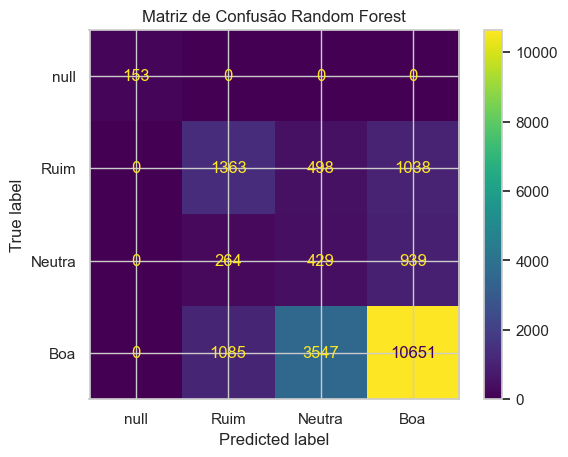

In [95]:
# Aplicando metricas. Importante verificar o F1-score, pois o dataset é desbalanceado
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Avaliando Random Forest

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")


print("\nResultado de Classificação:")
print(classification_report(y_test, y_pred, target_names=['null', 'Ruim', 'Neutra', 'Boa'])) # target_names são os nomes das classes

# Mostrar Matriz de Confusão
print("\nMatriz de Confusão Random Forest:")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['null', 'Ruim', 'Neutra', 'Boa'])
disp.plot()
plt.title("Matriz de Confusão Random Forest") 
plt.show() 

In [56]:
# Avaliando Logistic Regression

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")


print("\nResultado de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Ruim', 'Neutra', 'Boa'])) # target_names são os nomes das classes

# Mostrar Matriz de Confusão
print("\nMatriz de Confusão Logistic Regression:")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Ruim', 'Neutra', 'Boa'])
disp.plot()
plt.title("Matriz de Confusão Logistic Regression") 
plt.show() 

NameError: name 'lr_model' is not defined

Acurácia no conjunto de teste: 0.6460

Resultado de Classificação:
              precision    recall  f1-score   support

        null       1.00      1.00      1.00       153
        Ruim       0.51      0.52      0.51      2899
      Neutra       0.11      0.28      0.16      1632
         Boa       0.85      0.71      0.77     15283

    accuracy                           0.65     19967
   macro avg       0.62      0.63      0.61     19967
weighted avg       0.75      0.65      0.69     19967


Matriz de Confusão Decision Tree:


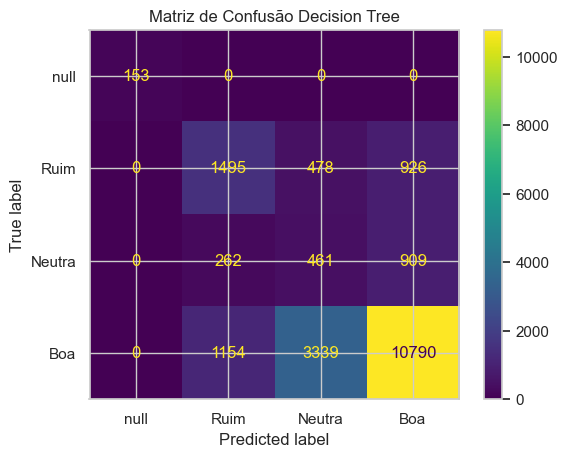

In [96]:
# Avaliando Decision Tree

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")


print("\nResultado de Classificação:")
print(classification_report(y_test, y_pred, target_names=['null', 'Ruim', 'Neutra', 'Boa'])) # target_names são os nomes das classes

# Mostrar Matriz de Confusão
print("\nMatriz de Confusão Decision Tree:")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['null', 'Ruim', 'Neutra', 'Boa'])
disp.plot()
plt.title("Matriz de Confusão Decision Tree") 
plt.show() 

In [97]:
# Explorando feature importances com Random Forest
importances = rf_model.fit(X, y).feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importances.head(10))




review_score_null                   0.678420
delivery_delay                      0.171069
estimated_total_time                0.087383
num_products                        0.026975
order_status_encoded                0.012828
mean_review_score_null_by_status    0.010360
total_pedidos                       0.008830
null_delivered_carrier_date         0.004135
dtype: float64


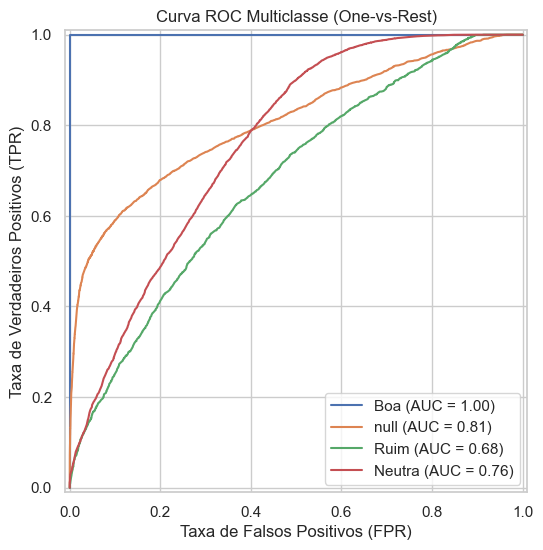

In [105]:
# Definindo os nomes das classes na ordem dos valores de y_test
class_names = ['null', 'Ruim', 'Neutra', 'Boa']

# Binarizando as classes para OVR usando os nomes corretos
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Calculando ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=class_names[class_label]).plot(ax=plt.gca())

plt.title('Curva ROC Multiclasse (One-vs-Rest)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend([f'{class_names[c]} (AUC = {roc_auc[i]:.2f})' for i, c in enumerate(classes)])
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix

# Gerando previsões
y_pred = rf_model.predict(X_test)

# Criando matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Exibindo matriz de confusão
import pandas as pd

cm_df = pd.DataFrame(cm, index=classes, columns=classes)
print("Matriz de Confusão:\n", cm_df)

# Calculando FP, FN, TP e TN
metricas = {}
for i, class_label in enumerate(classes):
    TP = cm[i, i]  # Verdadeiro Positivo (Diagonal principal)
    FN = cm[i, :].sum() - TP  # Falsos Negativos (Linha)
    FP = cm[:, i].sum() - TP  # Falsos Positivos (Coluna)
    TN = cm.sum() - (TP + FP + FN)  # Verdadeiro Negativo (Tudo menos linha e coluna da classe)

    metricas[class_label] = {"TP": TP, "FN": FN, "FP": FP, "TN": TN}

# Transformando em DataFrame para visualização
metricas_df = pd.DataFrame(metricas).T
print("\nMétricas FP, FN, TP e TN:\n", metricas_df)


Matriz de Confusão:
      -1     0     1      2
-1  153     0     0      0
 0    0  1579   484    836
 1    0   177   711    744
 2    0   998  3653  10632

Métricas FP, FN, TP e TN:
        TP    FN    FP     TN
-1    153     0     0  19814
 0   1579  1320  1175  15893
 1    711   921  4137  14198
 2  10632  4651  1580   3104


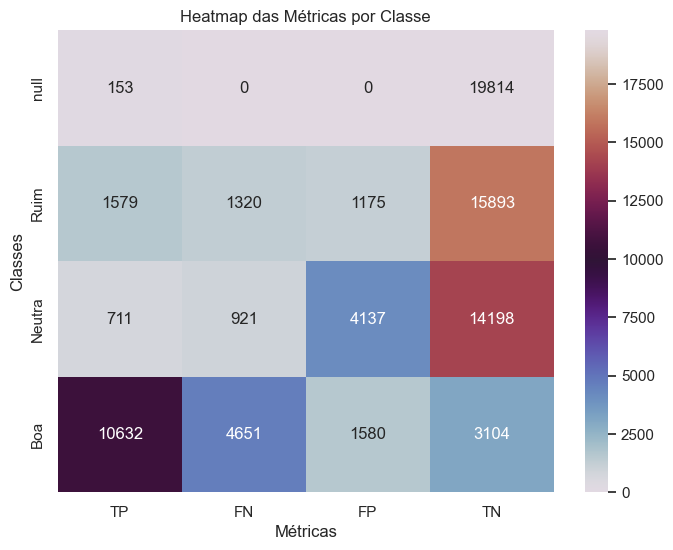

In [114]:
import seaborn as sns
import pandas as pd

# Criando DataFrame
metricas_df = pd.DataFrame({
    "TP": TP,
    "FN": FN,
    "FP": FP,
    "TN": TN
}, index=classes)

# Criando heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metricas_df, annot=True, cmap="twilight", fmt='d')
plt.title("Heatmap das Métricas por Classe")
plt.xlabel("Métricas")
plt.ylabel("Classes")
plt.show()




--------------------------------------------------------------------------------------------------------